![https://e.rpp-noticias.io/normal/2015/12/22/285428_50186.jpg](https://e.rpp-noticias.io/normal/2015/12/22/285428_50186.jpg)

**ESCUELA DE INGENIERÍA MECATRÓNICA**

## `PROCESAMIENTO DIGITAL DE SEÑALES E IMÁGENES`

### `Docente: Ms. Ing. Emerson Maximo Asto Rodriguez`

```
Práctica 4: implementación de la convolución
```

## **Practica 4: Implementación de la convolución discreta**

###**4.1. Importación de Librerías**

* **Librerias a utilizar:**

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl
import time
from IPython import display

plt.style.use(('dark_background')) #Estilo de la gráfica para el modo oscuro

###**4.2. Cálculo de la convolución usando una funcion de alto nivel**

![https://graphics.stanford.edu/courses/cs178/applets/convolution-equation2-c.jpg](https://graphics.stanford.edu/courses/cs178/applets/convolution-equation2-c.jpg)


![https://qph.fs.quoracdn.net/main-qimg-cb81d3dfbe146b84ebf717ec12722f32.webp](https://qph.fs.quoracdn.net/main-qimg-cb81d3dfbe146b84ebf717ec12722f32.webp)

* **Creación de la señal y el kernel**

In [15]:
#Creación de una señal arbitraria
senal_0 = np.concatenate((np.zeros(30),np.ones(3),np.zeros(20),4*np.ones(10),-np.ones(40),np.zeros(30),np.ones(50),np.zeros(30)), axis=250)

#Creación del Kernel
kernel = np.exp( -np.linspace(-10,10,100)**2) #campana gaussiana (no exactamente)
kernel = kernel/np.sum(kernel) #normalización
N=len(senal_0) #Longitud de la señal


* **Mostrando señales creadas**

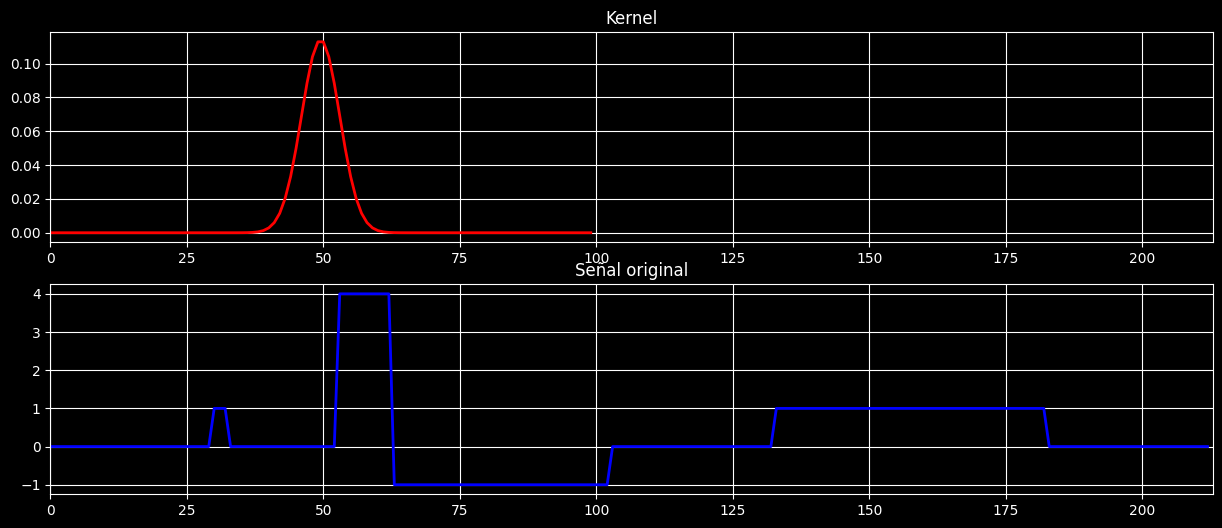

In [16]:
plt.figure(figsize=(15,6))


plt.subplot(211)
plt.plot(kernel,'r',linewidth=2)
plt.xlim([0,N])
plt.title('Kernel')
plt.grid()

plt.subplot(212)
plt.plot(senal_0,'b',linewidth=2)
plt.xlim([0,N])
plt.title('Señal original')
plt.grid()

plt.show()


 * **Cálculo y gráfica de la convolución**

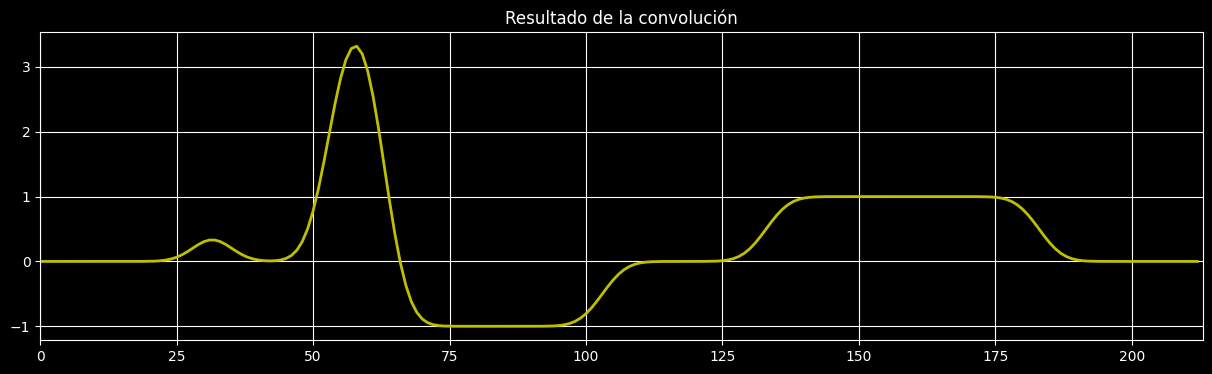

In [17]:
resultado=np.convolve(senal_0,kernel,'same')  #Cálculo de la convolución
                                              #Donde 'same' limita el eje x a las dimensiones de la función de entrada

plt.figure(figsize=(15,4))
plt.plot(resultado,'y',linewidth=2)
plt.xlim([0,N])
plt.title('Resultado de la convolución')
plt.grid()
plt.show()

###**4.2. Detalles de la convolución**
>*Longitud de la convolución de 2 señales.*

>*Efecto del kernel*

* **Creación de señales y aplicación de la convolución**





In [18]:
senal_1=np.zeros(20)
senal_1[8:15]=1

kernel=np.array([1,.64,.36,.16,.04]) #bajada cuadratica, un  kernel arbitario

nSenal_1=len(senal_1)
nKernel=len(kernel)
nconvolution=nSenal_1+nKernel-1

resultado=np.convolve(senal_1,kernel,'full')

* **Graficando resultados**

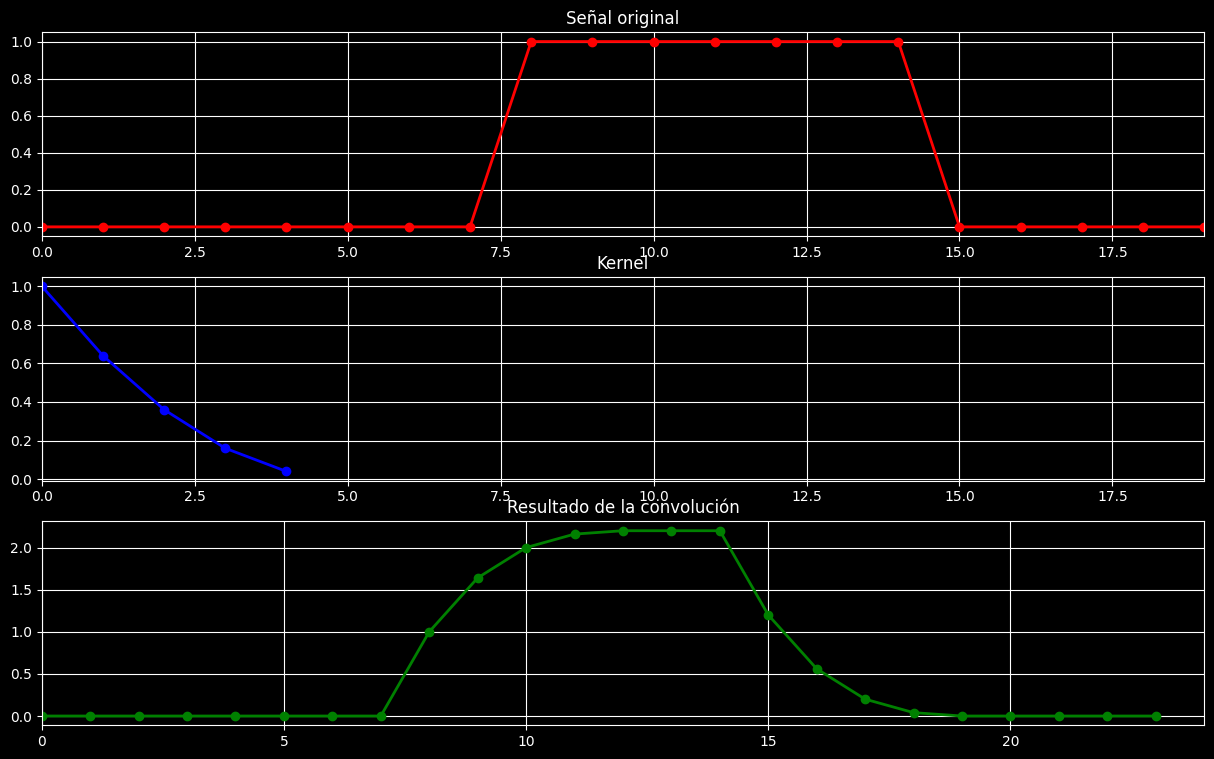

In [19]:
plt.figure(figsize=(15,9))

#Grafica "senal_1"
plt.subplot(311)
plt.plot(senal_1,'ro-',linewidth=2)
plt.xlim([0,nSenal_1-1])
plt.title('Señal original')
plt.grid()

#Gráfica Kernel
plt.subplot(312)
plt.plot(kernel,'bo-',linewidth=2)
plt.xlim([0,nSenal_1-1])
plt.title('Kernel')
plt.grid()

#Gráfica de los resultados
plt.subplot(313)
plt.plot(resultado,'go-',linewidth=2)
plt.xlim([0,nconvolution])
plt.title('Resultado de la convolución')
plt.grid()
plt.show()

###**4.3. Animación de la convolución**

*Se usarán las señales creadas en el apartado anterior*

In [20]:
import warnings
warnings.filterwarnings('ignore')

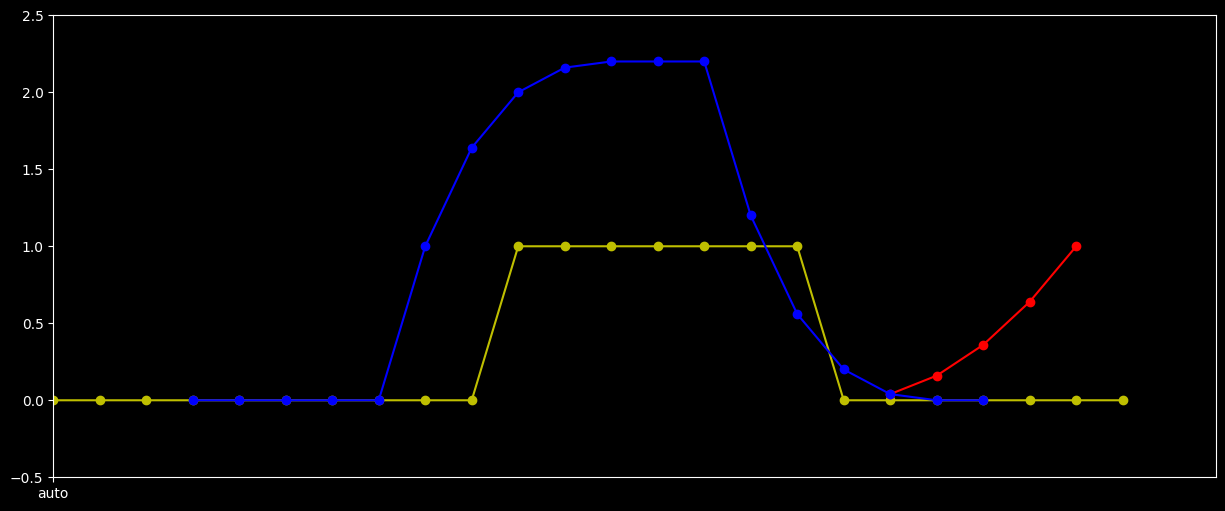

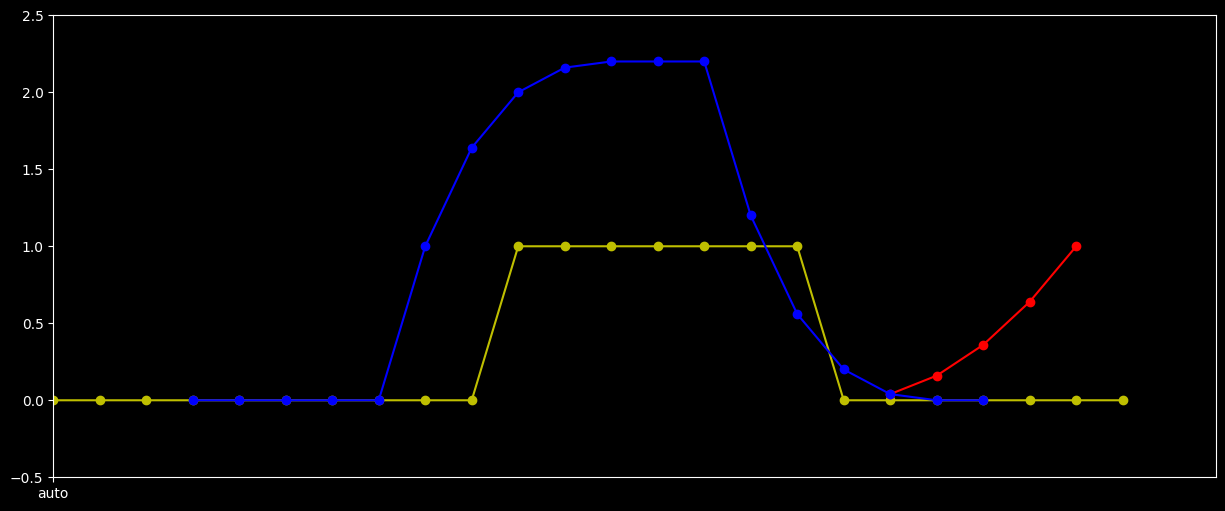

In [35]:
#Graficamos el proceso de la convolución

#1Paring
mitad_kernel=int(np.floor(nKernel/2)) #redondeamos hacia abajo (se aumentan 2 muestras a cada lado)

kernel_invertido=kernel[::-1] #Invirtiendo el kernel

#Concatenamos el paring con 0s
senal_1_parchado=np.concatenate((np.zeros(mitad_kernel),senal_1,np.zeros(mitad_kernel)),axis=0)

#Creamos el vecotr convolución
conv_resultado=np.zeros(nconvolution)
plt.figure(figsize=(15,6)) #Creamos esta primera figura


for p in range(mitad_kernel,nconvolution-mitad_kernel): #Iteramos en la mitad de kernel para evitar salir del rango
  #Estraemos un trozito de la función de la señal de tamaño del rango del kernel
  trozito=senal_1_parchado[p-mitad_kernel:p+mitad_kernel+1]

  #Producto punto del trozo de función con el kernel invertido.
  conv_resultado[p]= np.sum(trozito * kernel_invertido)

  # Hacemos la gráfica}
  plt.cla() #limpiar los ejes
  plt.axis(['auto','auto', -0.5, 2.5]) # fijamos los ejes, x automático, y el dominio aproximado
  plt.plot(senal_1_parchado, "yo-") # Gráfica de la señal original
  plt.plot(np.arange(p-mitad_kernel-1, p+mitad_kernel), kernel_invertido, "ro-") # Muestra el movimiento del kernel
  plt.plot(np.arange(mitad_kernel+1, p), conv_resultado[mitad_kernel+1:p], "bo-") #Gráfica resultado
  plt.xlim([0,nconvolution+1])
  display.clear_output(wait=True) #Refresca la gráfica
  display.display(pl.gcf()) # Grafica la celda actual
  time.sleep(0.5)

  #Actualizamos el vector convolución
conv_resultado=conv_resultado[mitad_kernel:-mitad_kernel]



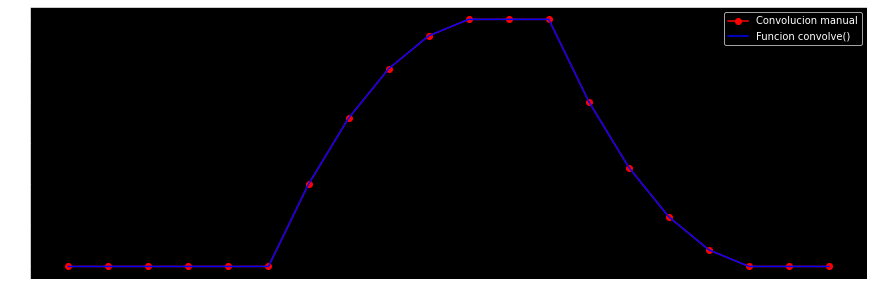